# IMDb, binary classification

In [1]:
import keras
print(keras.__version__)

2.10.0


In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data.shape)
print(train_data[0])
print(train_labels[0])

(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [4]:
#restore the sentence
word_index = imdb.get_word_index()
# print(word_index)

In [5]:
reverse_word_index = dict([value, key] for (key, value) in word_index.items())

decoded_review = ' '.join(reverse_word_index.get(i-3,'?') for i in train_data[0])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [6]:
# Preprocessing
# one-hot encoding

import numpy as np

def vectorize_sequence(sequences, dimension=10000): #set default value for parameter
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1

    return results

X_train = vectorize_sequence(train_data)
X_test = vectorize_sequence(test_data)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
# Build model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
#split validation data
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
history = model.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.4967 - accuracy: 0.7813 - val_loss: 0.3707 - val_accuracy: 0.8715
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2915 - accuracy: 0.9055 - val_loss: 0.3572 - val_accuracy: 0.8524
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2114 - accuracy: 0.9313 - val_loss: 0.2923 - val_accuracy: 0.8797
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1660 - accuracy: 0.9460 - val_loss: 0.2999 - val_accuracy: 0.8787
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1354 - accuracy: 0.9557 - val_loss: 0.2859 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1115 - accuracy: 0.9649 - val_loss: 0.3010 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0892 - accuracy: 0.9740 - val_loss: 0.3230 - val_accuracy: 0.8796
Epoch 8/20
30

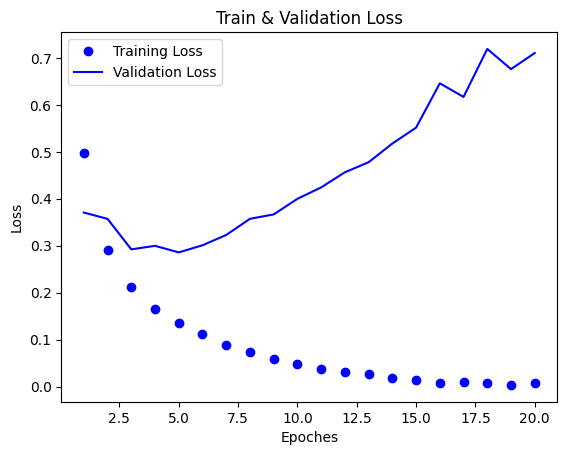

In [11]:
# Visualization
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epoches = range(1, len(acc)+1)

plt.plot(epoches, loss, 'bo', label='Training Loss')
plt.plot(epoches, val_loss, 'b-', label='Validation Loss')
plt.title('Train & Validation Loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()

plt.show()

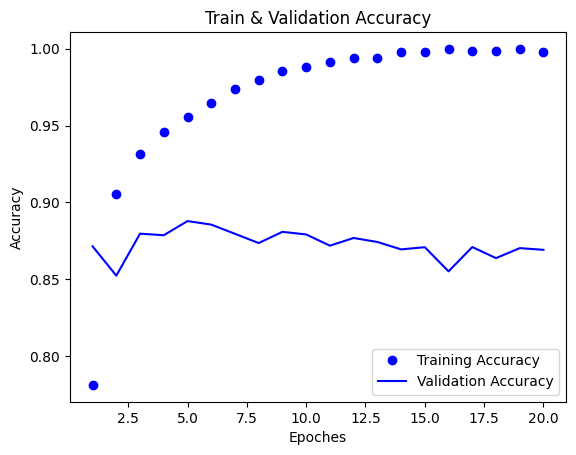

In [12]:
plt.plot(epoches, acc, 'bo', label='Training Accuracy')
plt.plot(epoches, val_acc, 'b-', label='Validation Accuracy')
plt.title('Train & Validation Accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()

plt.show()